In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from yra_grad.tensor import Tensor
from yra_grad.optim import SGD

In [3]:
#x_init = np.random.randn(3,3).astype(np.float32)
#W_init = np.random.randn(3,3).astype(np.float32)

x = Tensor.randn(3,3)
W = Tensor.randn(3,3)


#print(x, W)
optim = SGD([W], 0.5)

for _ in range(20):

    out = ((x @ W) ** 2).sum()
    out.backward()

    optim.step()
    optim.zero_grad()
    
    print(out.data)

7.1308503
1.7827126
0.44567814
0.111419536
0.027854884
0.006963721
0.0017409303
0.00043523256
0.00010880814
2.7202035e-05
6.800509e-06
1.7001272e-06
4.250318e-07
1.0625795e-07
2.6564487e-08
6.641122e-09
1.6602805e-09
4.1507012e-10
1.0376753e-10
2.5941882e-11


# Neural Net

In [4]:
def get_regression(n_points, n_dims):
    x = np.sort(np.random.randn(n_points, n_dims) * 100, axis=0)
    W = np.random.randn(n_dims, 1)

    y = x @ W + np.random.randn(n_points, 1) * 10
    
    return x, y, W

In [5]:
def mse(y_true, y_pred):
    #print(y_true.shape())
    #print(y_pred.shape())
    res = y_true.minus(y_pred)
    return res.multiply(res).sum()

In [6]:
class LinearLayer:
    def __init__(self, fin, fout):
        self.w = Tensor.randn(fin, fout)
        
    def forward(self, x):
        out = x @ self.w
        return out
        
    def parameters(self):
        return [self.w]

In [7]:
class BobNet:
    def __init__(self):
        self.l1 = LinearLayer(2, 20)
        self.l2 = LinearLayer(20, 1)
        
    def forward(self, x):

        x = self.l1.forward(x)

        x = x.relu()

        x = self.l2.forward(x)

        return x
    
    def parameters(self):
        parameters = []
        parameters.extend(self.l1.parameters())
        parameters.extend(self.l2.parameters())
        return parameters

In [8]:
x, y, W_target = get_regression(100, 2)
model = BobNet()
optim = SGD(model.parameters(), 0.005)

losses = []
accuracies = []

BS = 30

for i in range(10000):
    idxs = np.random.randint(100, size=BS)
    x_batch = Tensor(x[idxs])
    y_batch = Tensor(y[idxs])

    preds = model.forward(x_batch)
    loss = mse(y_batch, preds)
    loss.backward()
    optim.step()
    optim.zero_grad()
    
    losses.append(loss.data / BS)

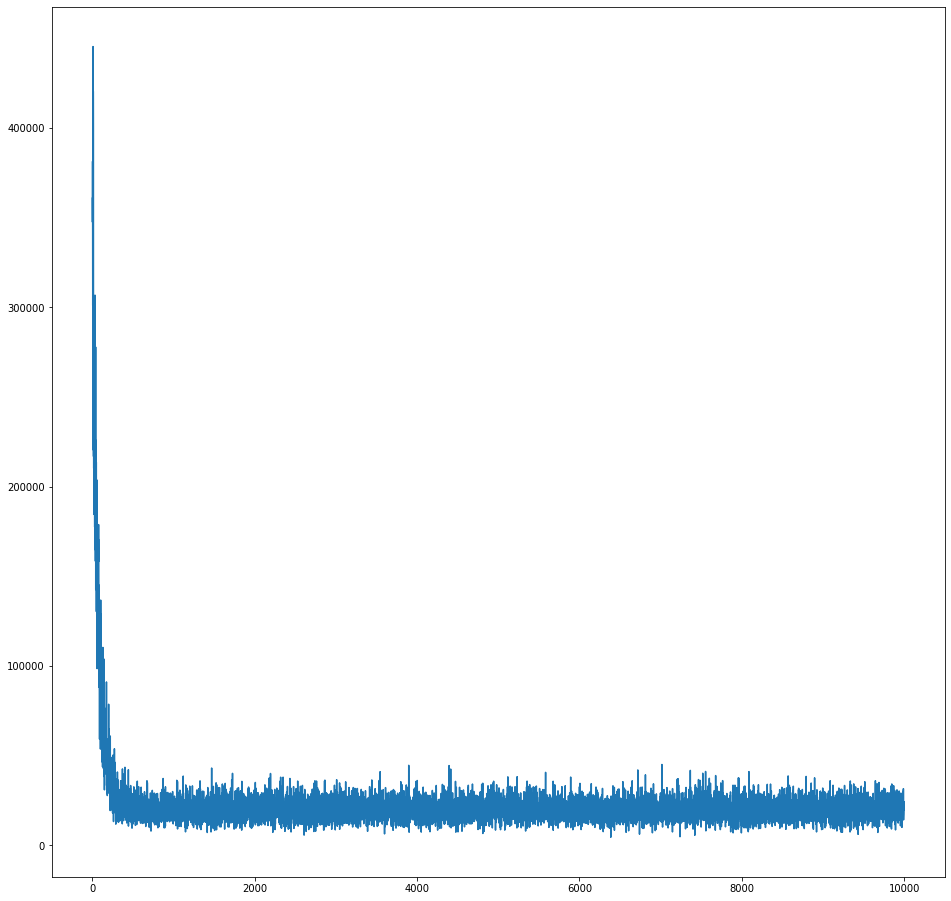

In [9]:
plt.figure(figsize=(16,16))
plt.plot(losses)